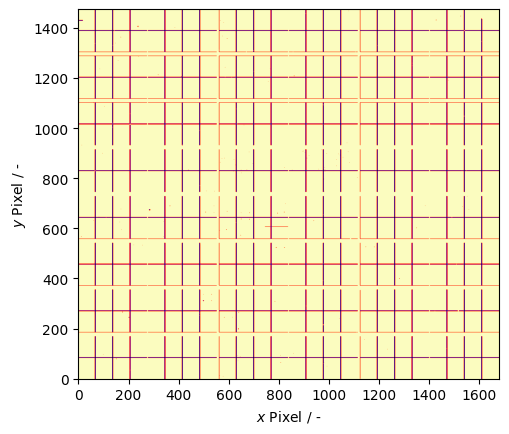

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class PilatusMask:
    def __init__(self):
        self.x_size, self.y_size = 1679, 1475
        self.e = 1
        self.regions = np.array([[488, 494, None, None],
                                 [982, 988, None, None],
                                 [None, None, 196, 212],
                                 [None, None, 408, 424],
                                 [None, None, 620, 636],
                                 [None, None, 832, 848],
                                 [None, None, 1044, 1060],
                                 [None, None, 1256, 1272],
                                 [None, None, 1468, 1484]])
        self.x_submodules = np.concatenate([
                np.arange(61, 428, 61),
                np.arange(555, 922, 61),
                np.arange(1049, 1416, 61),
                ])
        y_region = self.regions[:,3]
        y_region = y_region[y_region != None]
        self.y_submodules = np.concatenate([y_region + 98, [98]])
        self.mask = np.zeros((self.x_size, self.y_size))
        for y1, y2, x1, x2 in self.regions:
            if y1 is None and y2 is None:
                self.mask[x1-1-self.e:x2+self.e,:] = -1
            else:
                self.mask[:,y1-1-self.e:y2+self.e] = -1
    
    def save_mask(self, filename):
        np.save(filename, self.mask)
    
    def plot_mask(self):
        fig, ax = plt.subplots()
        ax.imshow(self.mask, cmap='magma', origin='lower', extent=[0, self.x_size, 0, self.y_size], aspect='equal')
        ax.set(xlabel='$x$ Pixel / -', ylabel='$y$ Pixel / -')
        plt.show()
    
    def sub_grid_masking(self):
        for x in self.x_submodules:
            self.mask[:,x-2:x+1] = -1
        for y in self.y_submodules:
            self.mask[y-2:y+1,:] = -1

    def combine_mask(self, path_to_mask):
        mask = np.load(path_to_mask)
        self.mask = np.logical_or(self.mask, mask).astype(int) + 1
        

mask = PilatusMask()
mask.sub_grid_masking()
mask.combine_mask('/home/ben/DESY_PDF/0_data/maskMZ.npy')
mask.combine_mask('/home/ben/DESY_PDF/0_data/config/mask.npy')
mask.plot_mask()
mask.save_mask('combined_subsub_grid_mask.npy')


In [8]:
#mask.combine_mask('/home/ben/DESY_PDF/0_data/config/mask.npy')
np.load('/home/ben/DESY_PDF/0_data/maskMZ.npy').max()

1